# Comparison of stock KPP with LES for 4 canonical cases

In this notebook we compare out-of-the-box KPP with LES data for the four canonical cases:

1. Free convection
2. Wind-driven shear mixing with neutral buoyancy forcing
3. Wind-driven shear mixing with destabilizing buoyancy forcing
4. Wind-driven shear mixing with stabilizing buoyancy forcing

In [1]:
using Pkg; Pkg.activate("..")

using 
    ColumnModelOptimizationProject, 
    ColumnModelOptimizationProject.KPPOptimization,
    OceanTurb,
    Printf

cases = ["free_convection", "shear_neutral", "shear_unstable", "shear_stable"]

datadir = joinpath("..", "data", "idealized")
dirs = Dict((c, joinpath(datadir, c)) for c in cases)

examples = Dict(
    "free_convection" => "wind_stress_N256_tau0_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_neutral"   => "wind_stress_N256_tau0.1_Q0_dTdz0.001_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_unstable"  => "wind_stress_N256_tau0.1_Q-75_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2",
    "shear_stable"    => "wind_stress_N256_tau0.04_Q10_dTdz0.01_k0.0001_dt0.25_days6_timeseries.jld2" )

examplepaths = Dict((c, joinpath(dirs[c], examples[c])) for c in cases);

┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.1/ColumnModelOptimizationProject/HEzqG.ji for ColumnModelOptimizationProject [8137535c-6844-11e9-1caa-ffc4fab9c8ab]
└ @ Base loading.jl:1184


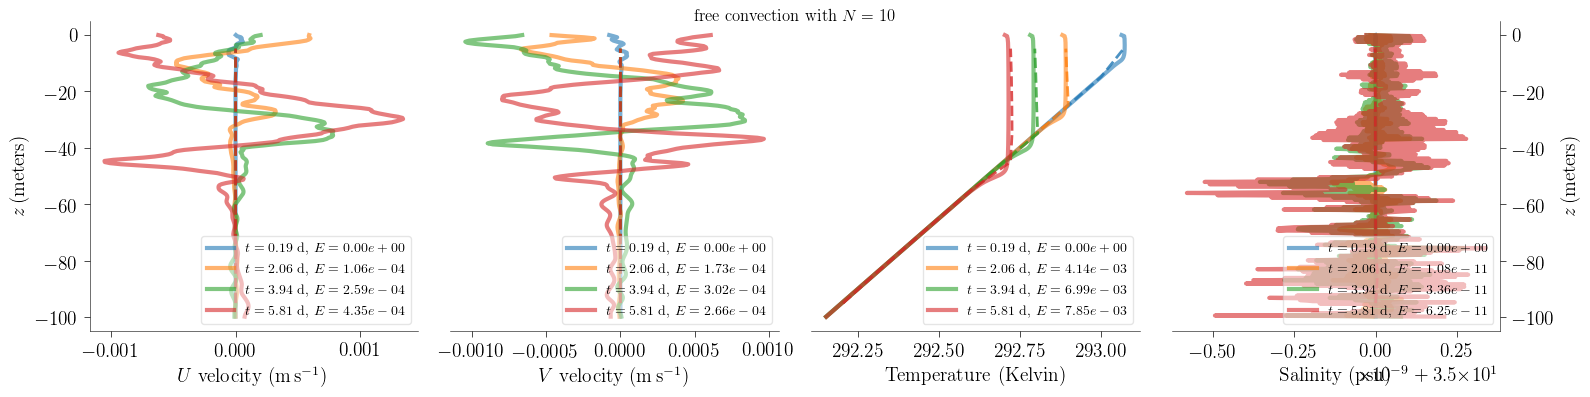

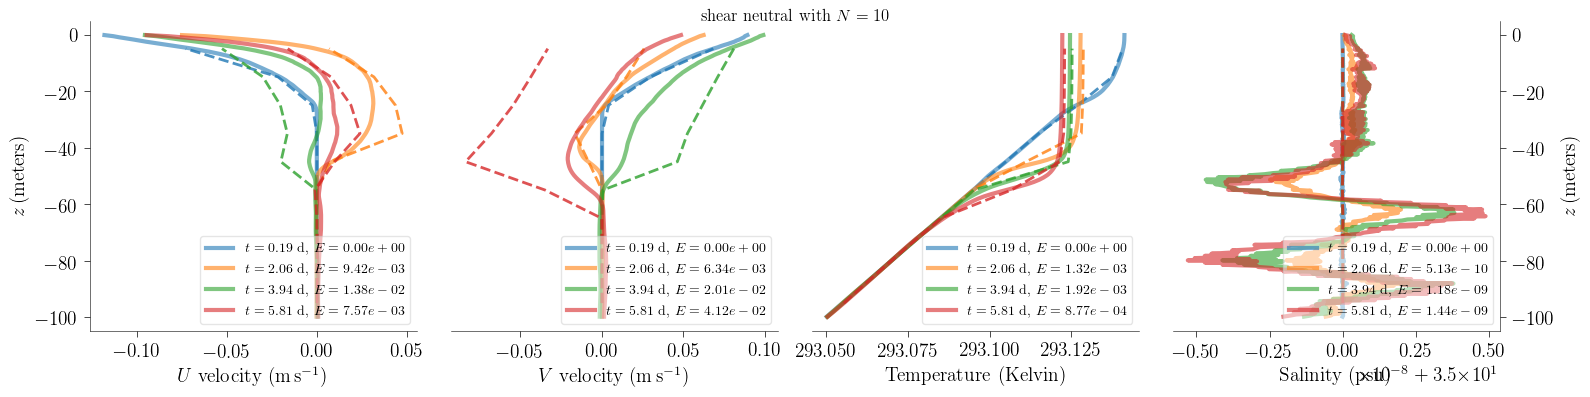

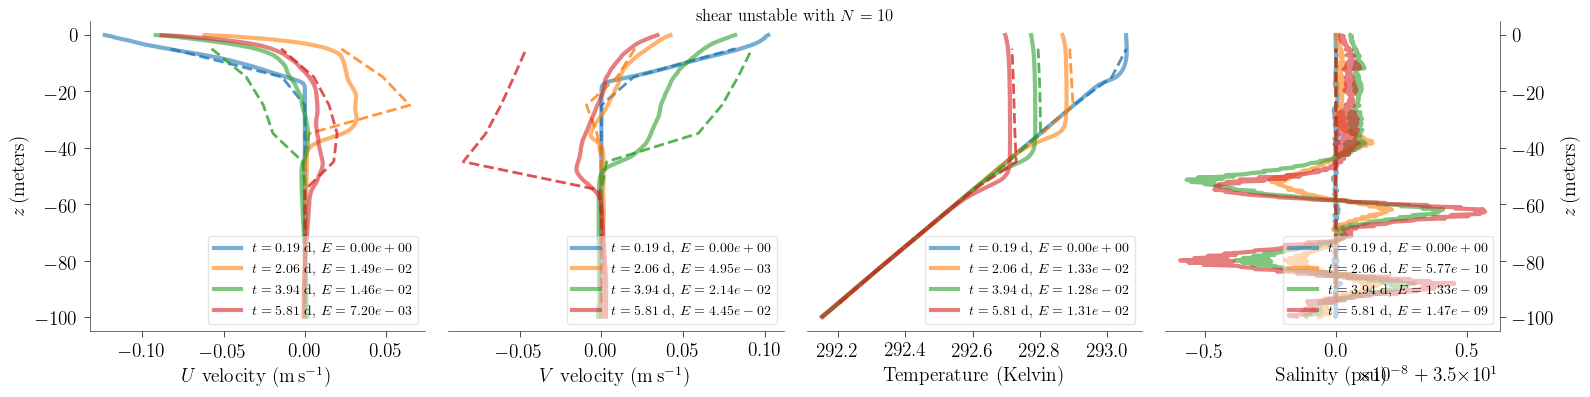

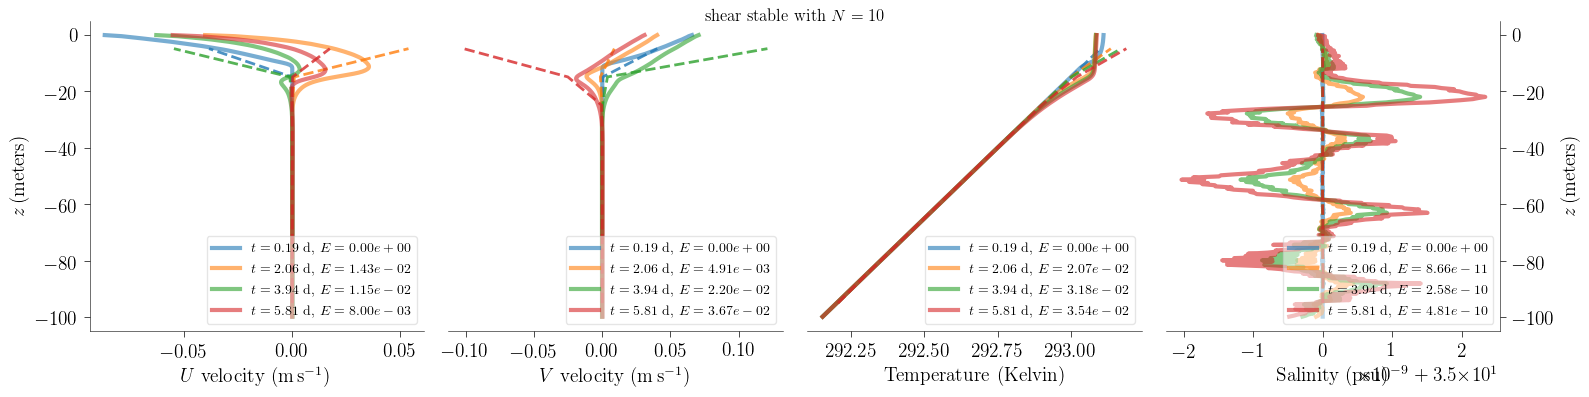

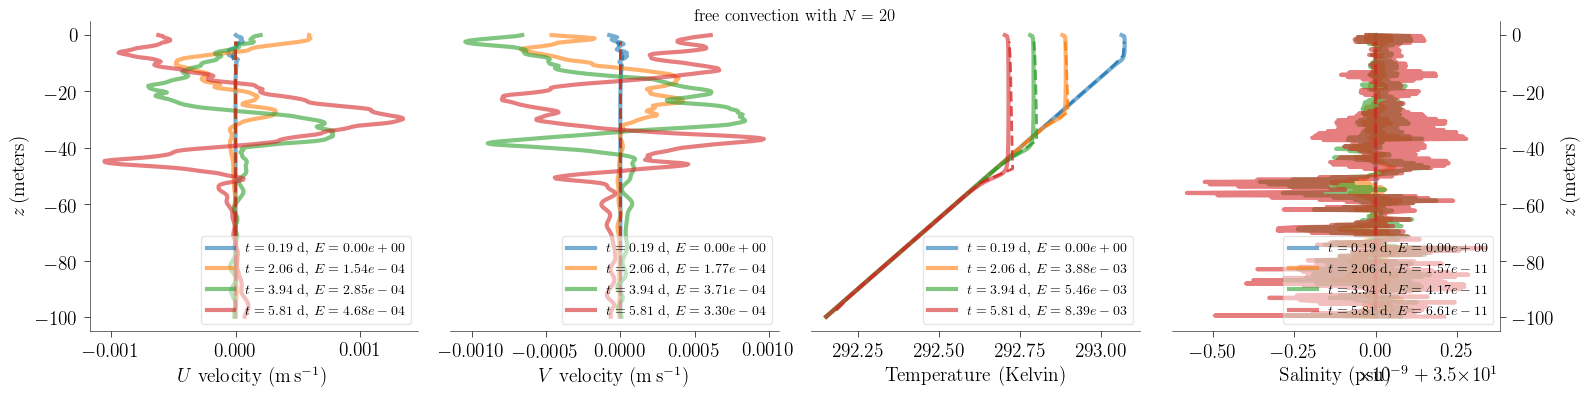

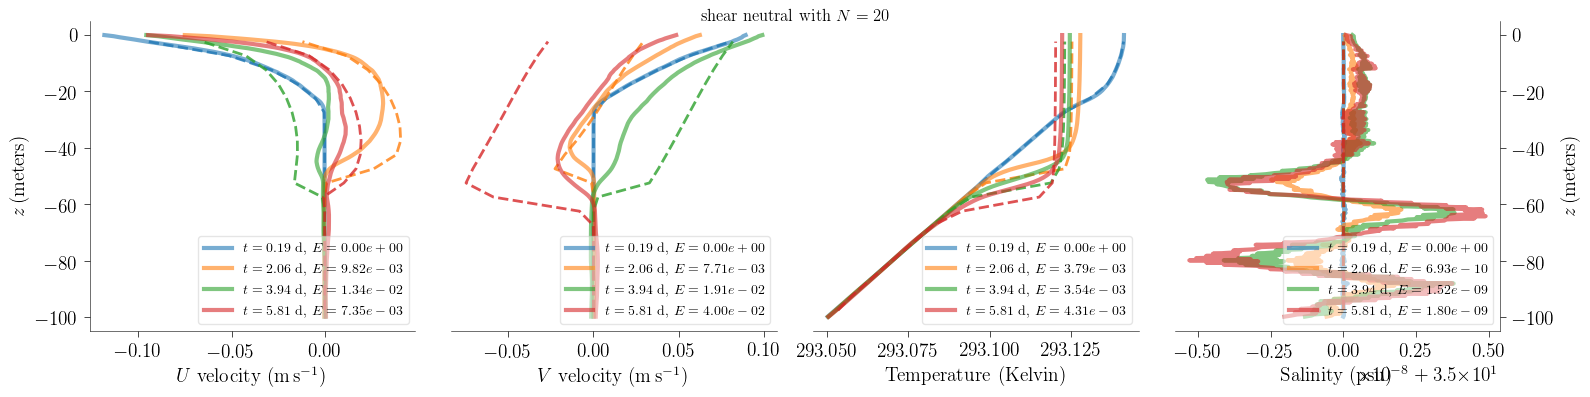

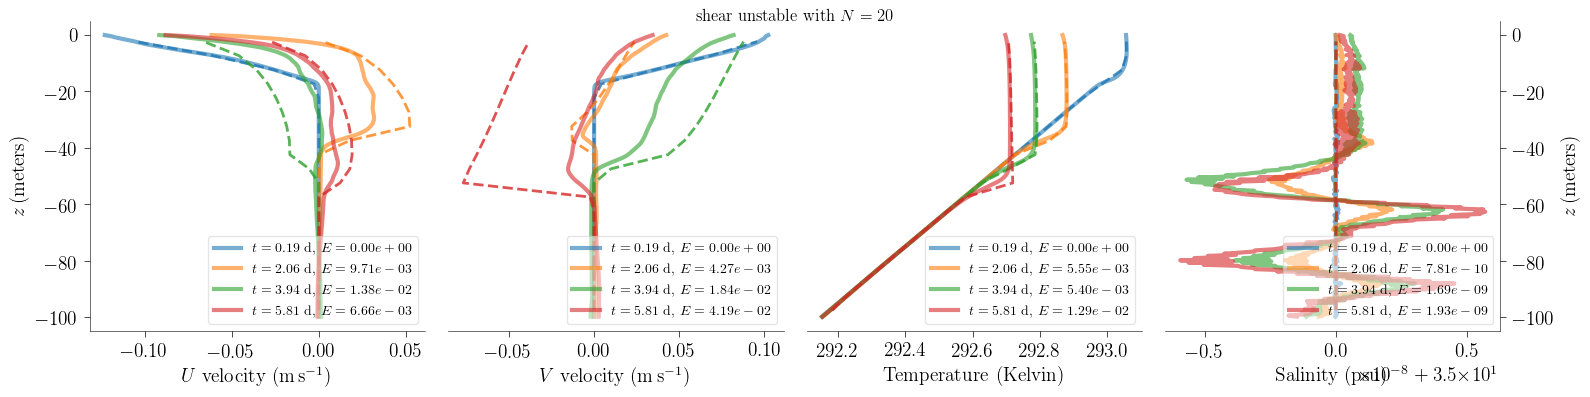

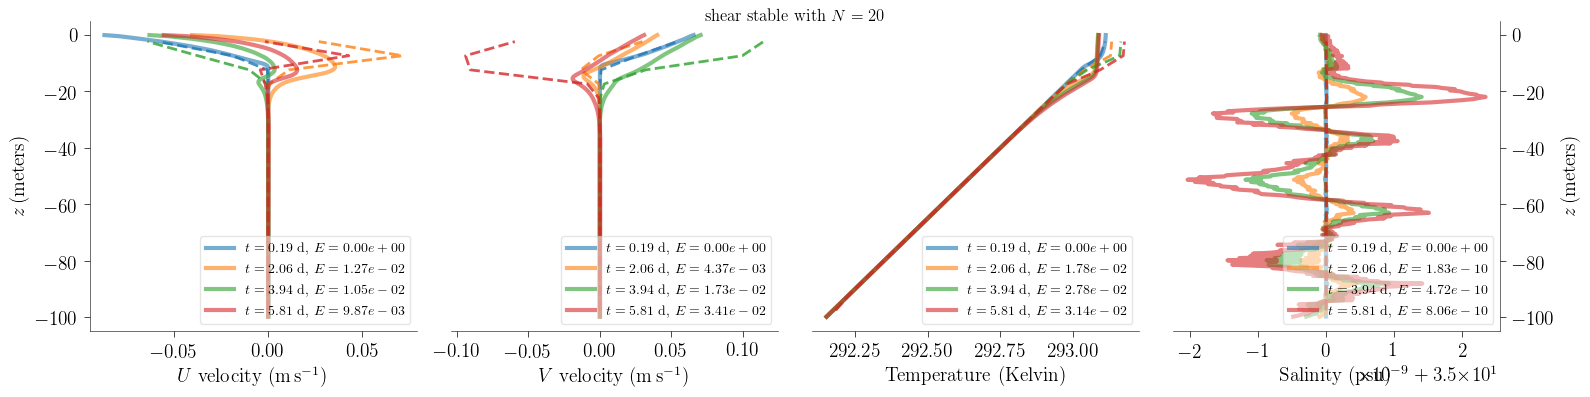

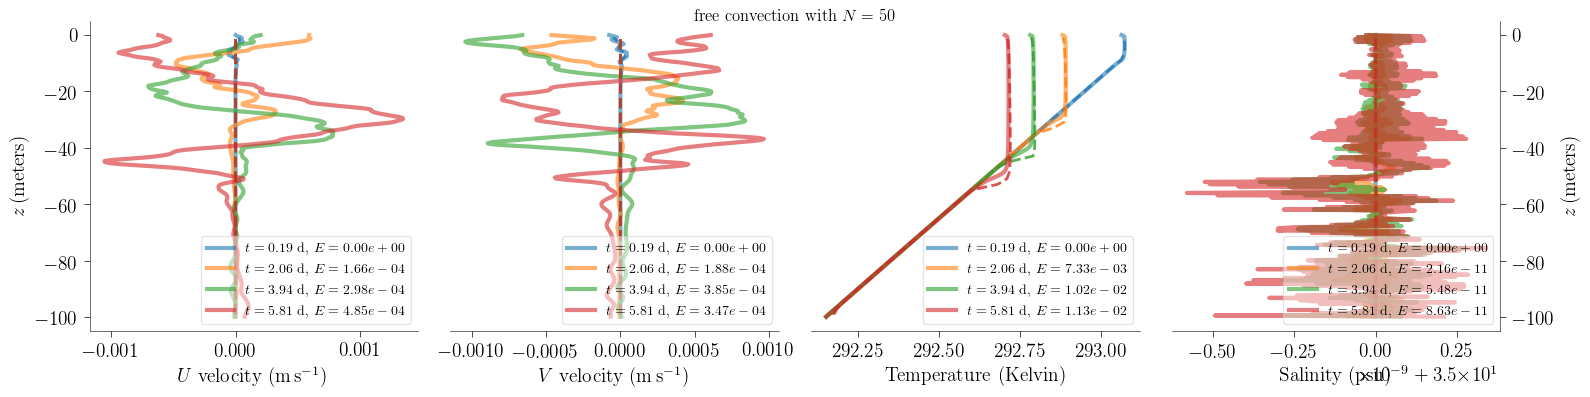

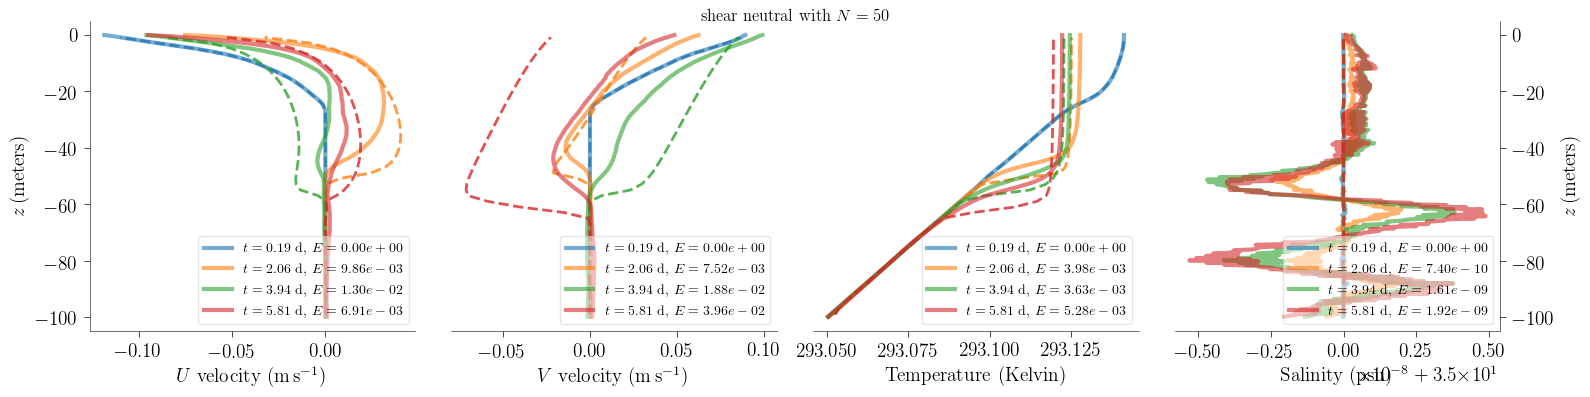

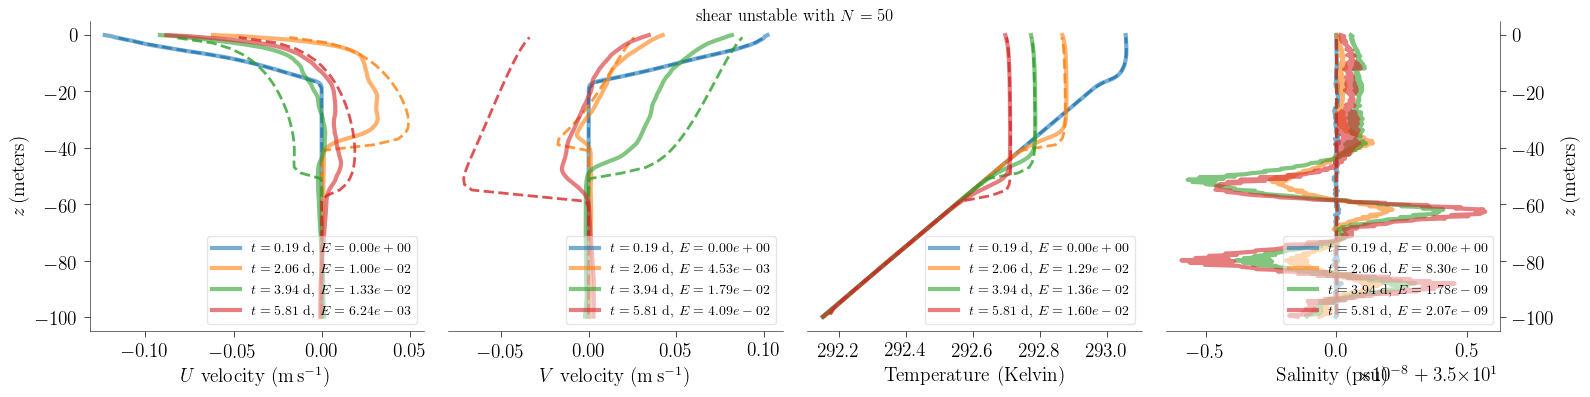

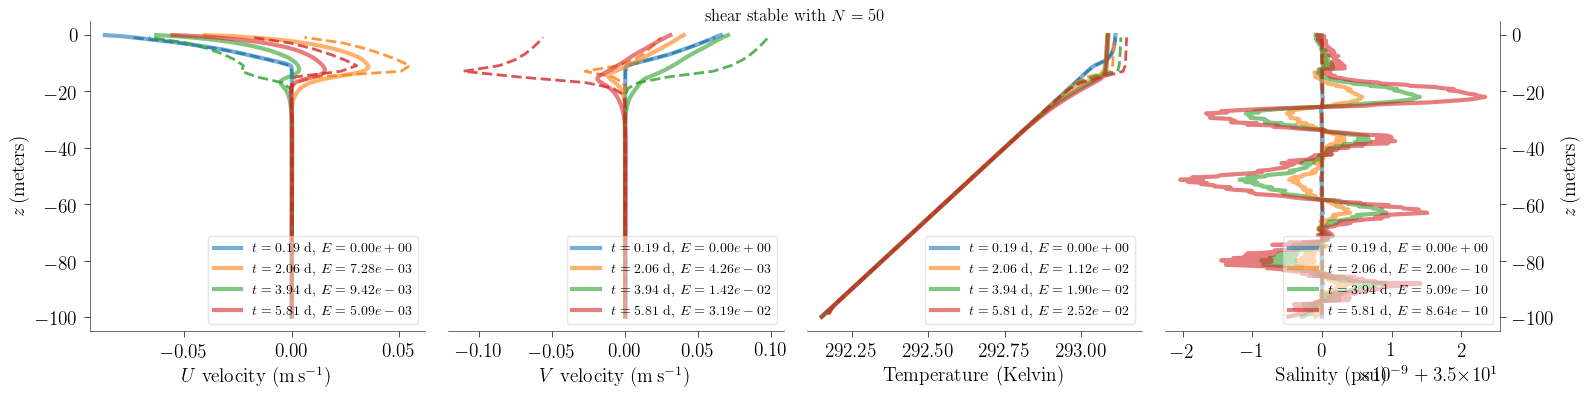

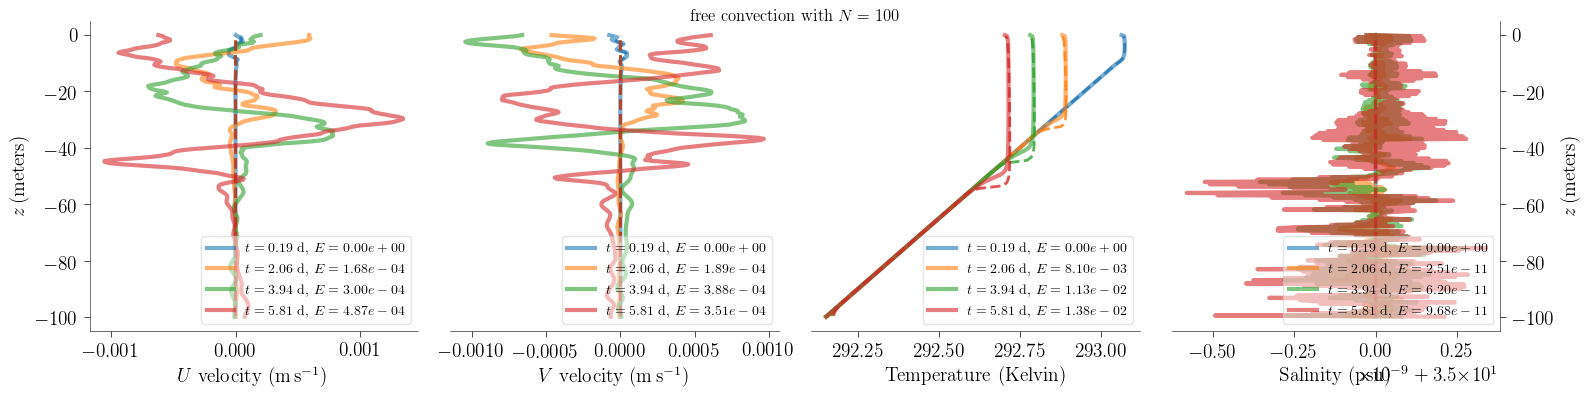

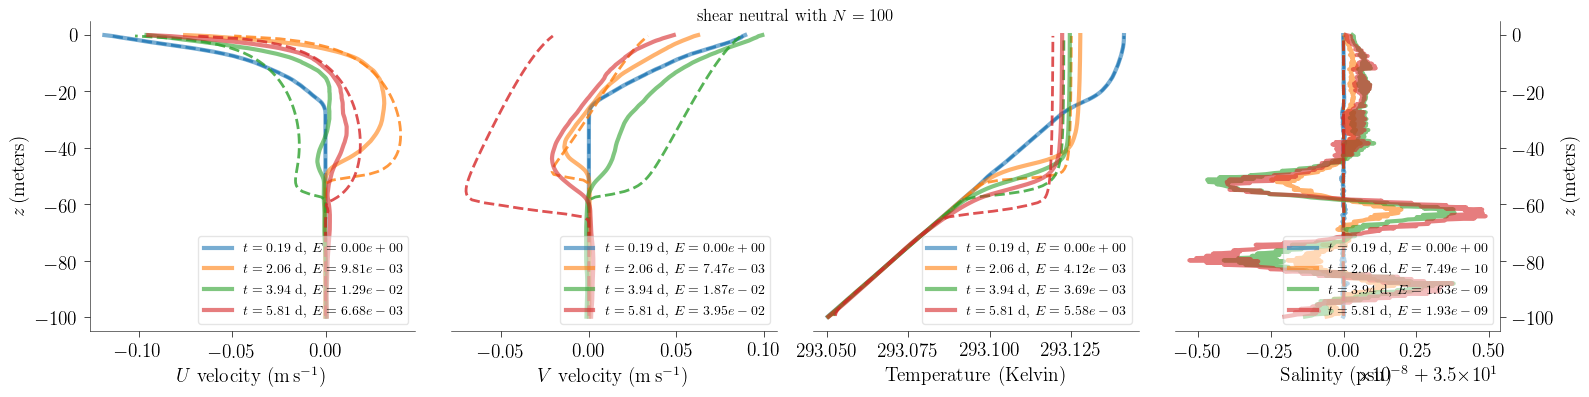

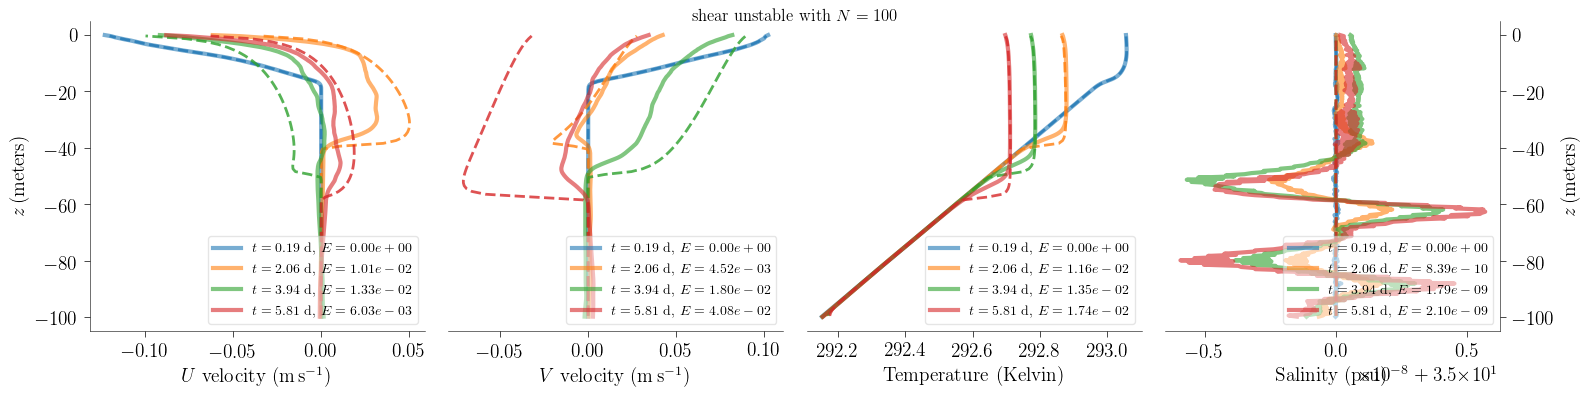

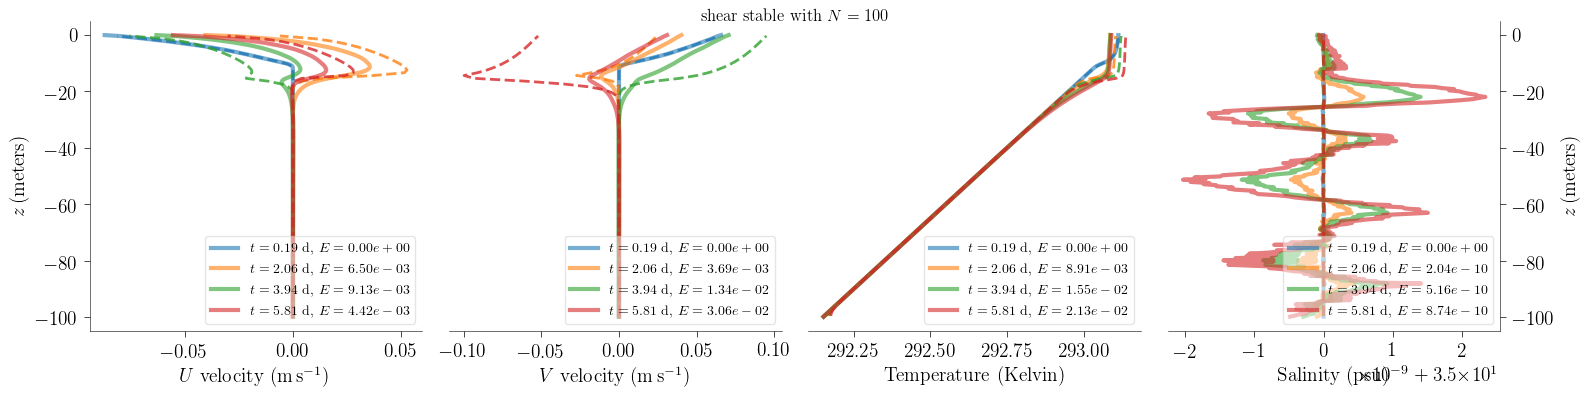

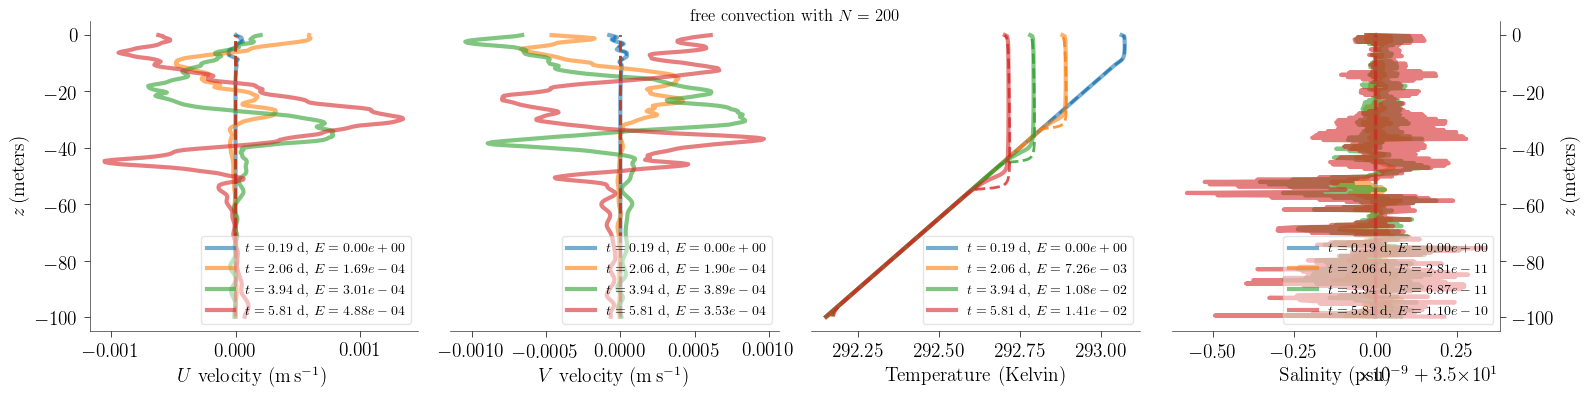

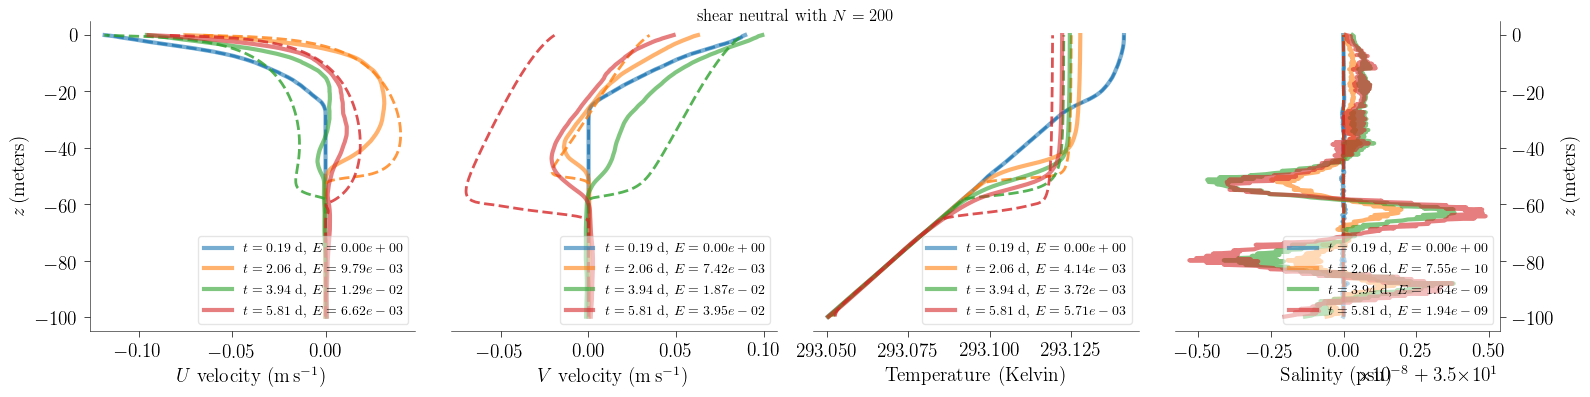

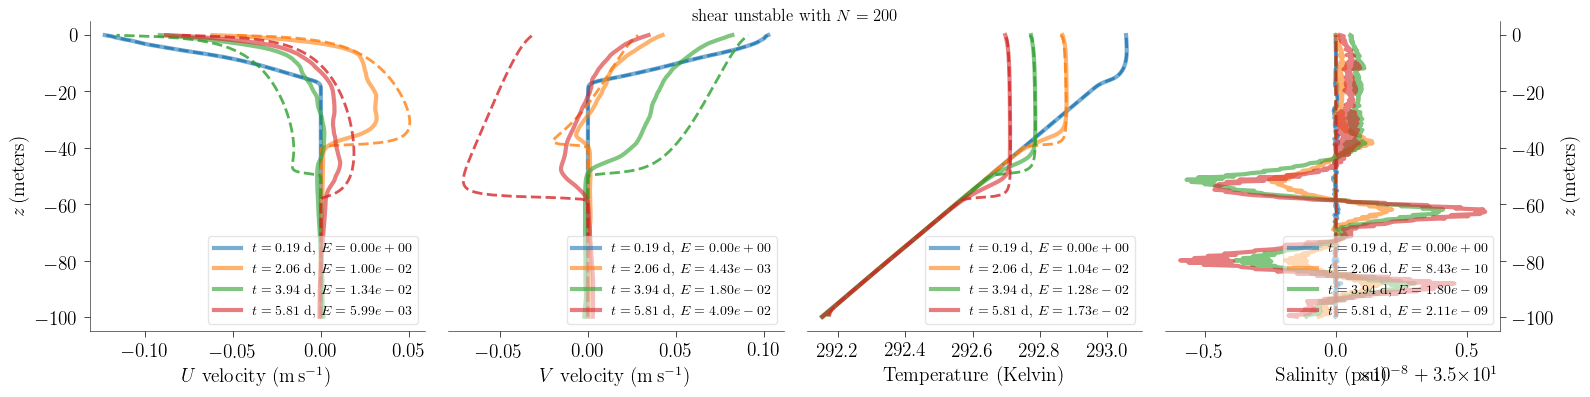

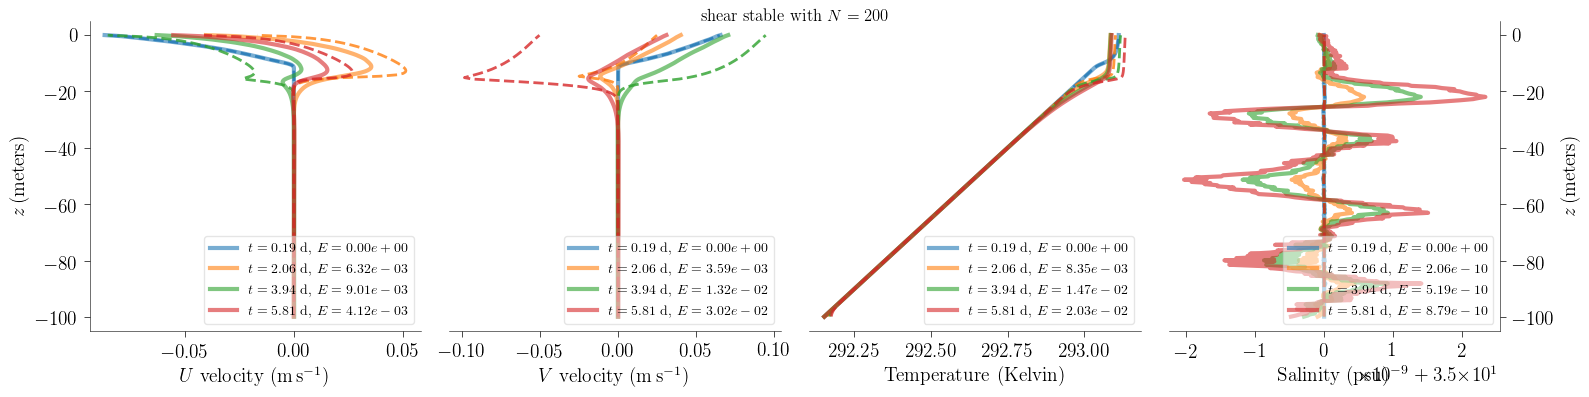

In [3]:
for N in [10, 20, 50, 100, 200]
    for case in cases
        column_data = ColumnData(examplepaths[case]; targets=(12, 22, 32))
        column_model = KPPOptimization.ColumnModel(column_data, 10*minute, N=N)
        default_params = DefaultFreeParameters(ShearNeutralParameters)

        fig, axs = visualize_realization(default_params, column_model, column_data,
            legendkwargs=Dict(:loc=>4))
        fig.suptitle(replace(case, "_" => " ") * @sprintf(" with \$ N = %d \$", N))
        fig.show()
        
        fig.tight_layout()
        fig.savefig(joinpath("..", "assets", case * "_kpp_les_comparison_N$N.png"), dpi=480)
    end
end